# Описание проекта
Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.
Шаги для выбора локации обычно такие:

1. В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
2. Строят модель для предсказания объёма запасов в новых скважинах;
3. Выбирают скважины с самыми высокими оценками значений;
4. Определяют регион с максимальной суммарной прибылью отобранных скважин.

Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.

# Подготовка данных


In [24]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from IPython.display import display

from collections import defaultdict

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 7)})

In [25]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [26]:
# смотрим размер таблицы, пропуски и вид таблицы
print('Размер таблицы: {}\n\nПропуски:\n{}'
      .format(geo_data_0.shape, geo_data_0.isnull().sum()), '\n')
print(geo_data_0.info())
display(geo_data_0.head())

Размер таблицы: (100000, 5)

Пропуски:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.4+ MB
None


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [27]:
# смотрим размер таблицы, пропуски и вид таблицы
print('Размер таблицы: {}\n\nПропуски:\n{}'
      .format(geo_data_1.shape, geo_data_1.isnull().sum()), '\n')
print(geo_data_1.info())
display(geo_data_1.head())

Размер таблицы: (100000, 5)

Пропуски:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.4+ MB
None


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [28]:
# смотрим размер таблицы, пропуски и вид таблицы
print('Размер таблицы: {}\n\nПропуски:\n{}'
      .format(geo_data_2.shape, geo_data_2.isnull().sum()), '\n')
print(geo_data_2.info())
display(geo_data_2.head())

Размер таблицы: (100000, 5)

Пропуски:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.4+ MB
None


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<Figure size 360x360 with 0 Axes>

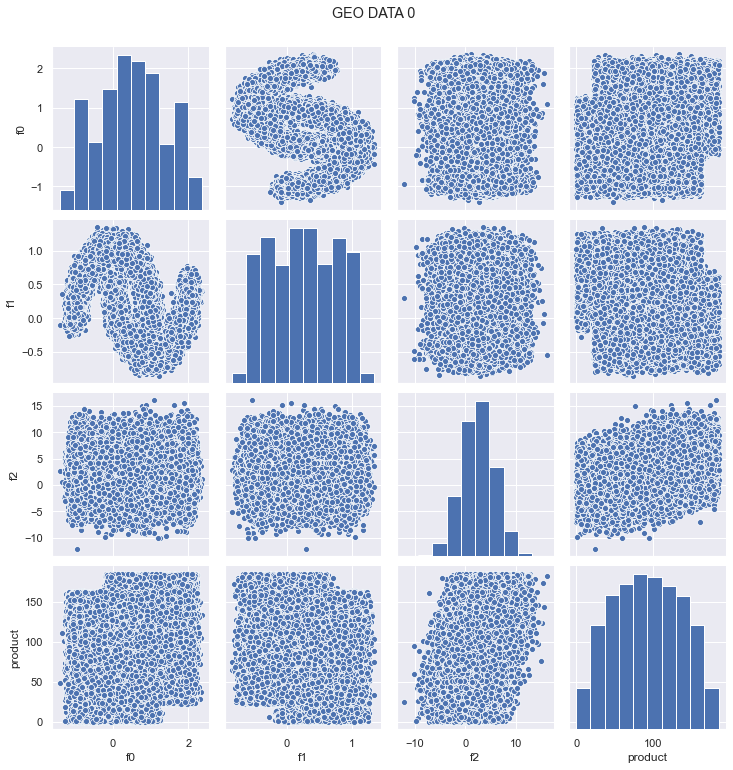

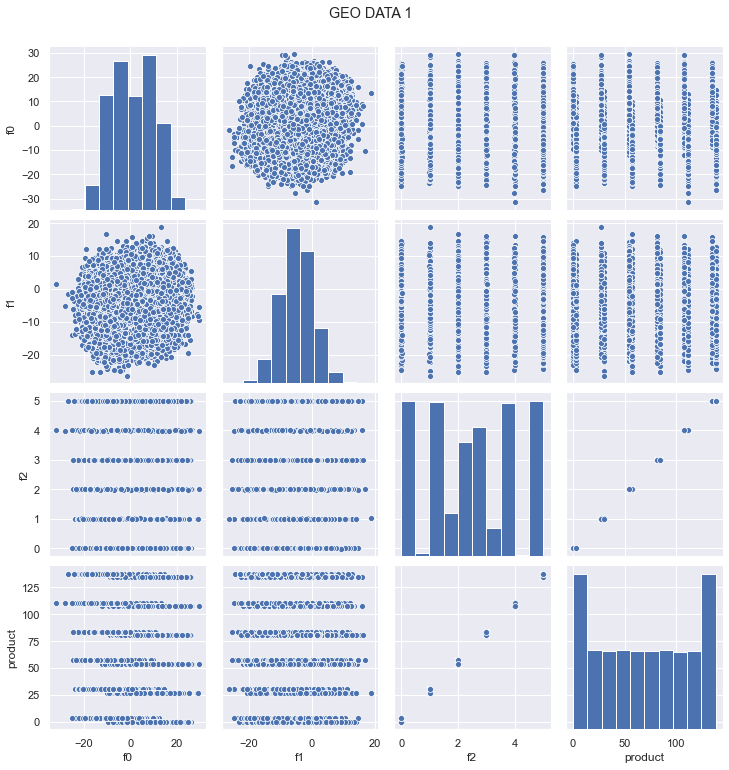

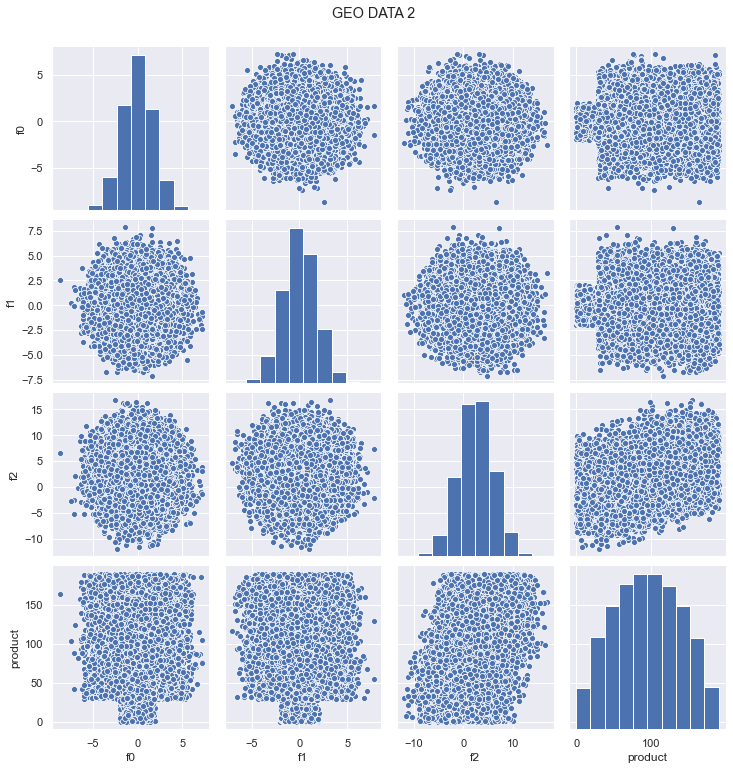

In [46]:
# посмотрим на матрицы регионов
# geo_data_0
plt.figure(figsize=(5, 5))
ax = sns.pairplot(geo_data_0)
ax.fig.suptitle("GEO DATA 0", y=1.05)
# geo_data_1
ax = sns.pairplot(geo_data_1)
ax.fig.suptitle("GEO DATA 1", y=1.05)
# geo_data_2
ax = sns.pairplot(geo_data_2)
ax.fig.suptitle("GEO DATA 2", y=1.05)
plt.show()

# Вывод

Могу выделить непохожую на остальные визуализации матрицу второй таблицы.\
Столбец f2 сильно коррелирует с столбцом Product, а гистограмы показывают неравномерное распределение.

In [7]:
# сохраним в переменную условно-рандомное число
state = 42

# создаём словарь в который будем сохранять результат работы модели
results = {
    'mean': [],
    'rmse': [],
}

In [8]:
def tf(data):
    """
    функция на вход принимает аргумент: "data", куда передается датафрейм.
    возвращает признаки и целевой признак.
    """
    features = data.drop(['product', 'id'], axis=1)
    target = data['product']
    
    return features, target

In [9]:
def split_data(data):
    """
    функция на вход принимает аргумент: "data", куда передается датафрейм.
    возвращает выборки, тренировочнуюю и валидационную.
    """
    features, target = tf(data)
    
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=state)
    
    return features_train, features_valid, target_train, target_valid

In [10]:
def train_predict(model, data, scatter=False, hist=False):
    """
    функция на вход принимает аргументы: "model", "data" и "viz"
    возвращает предсказания модели и метрику RMSE.
    аргумент "viz==True" выполняет визуализацию поведения линейной регрессии.
    """
    features, target = tf(data)
    features_train, features_valid, target_train, target_valid = split_data(data)
    
    model.fit(features_train, target_train)
    predicted = model.predict(features_valid)
    rmse = mean_squared_error(target_valid, predicted) ** 0.5
    
    results['mean'].append(predicted.mean())
    results['rmse'].append(rmse)
    
    if scatter == True:
        plt.figure(figsize=(5, 5))
        ax = sns.regplot(target_valid, predicted)
        plt.xlabel('Правильные ответы')
        plt.ylabel('Предсказания модели')
        plt.title('Поведение модели')
        plt.show()
    
    if hist == True:   
        plt.figure(figsize=(5, 5))
        ax = sns.distplot(predicted)
        plt.title('График предсказаний')
        plt.show()
    
    return predicted, rmse

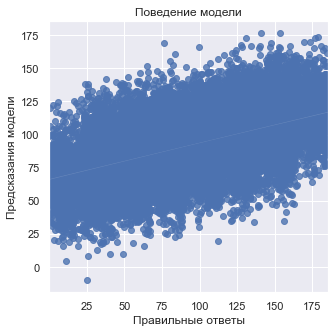

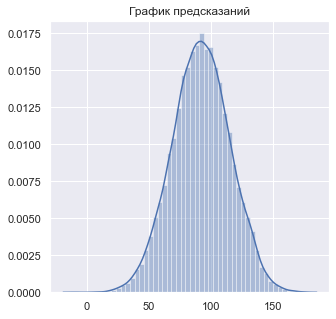

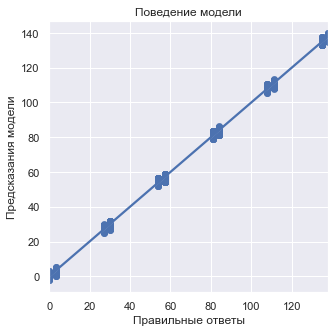

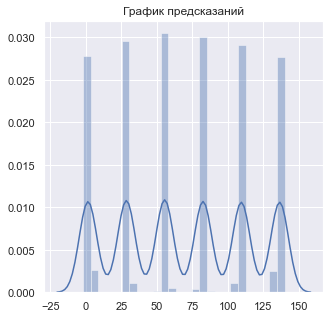

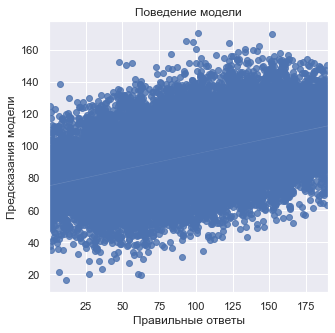

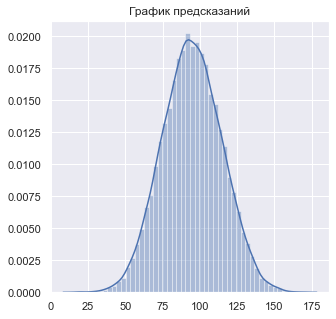

(array([ 98.30191642, 101.59246124,  52.4490989 , ...,  64.09839   ,
         83.76413542,  86.55864415]),
 40.14587231134218)

In [11]:
model = LinearRegression()
train_predict(model, geo_data_0, scatter=True, hist=True)
train_predict(model, geo_data_1, scatter=True, hist=True)
train_predict(model, geo_data_2, scatter=True, hist=True)

In [12]:
results

{'mean': [92.39879990657768, 68.71287803913762, 94.77102387765939],
 'rmse': [37.75660035026169, 0.8902801001028786, 40.14587231134218]}

In [13]:
# сохраним в переменные известные нам ключевые значения для расчетов
budget = 10**10
well_points = 500
max_wells = 200
one_well_cost = budget / max_wells
barrel_profit = 450 * 1000
# посчитаем колличество баррелей необходимых для разработки
# одного месторождения и сохраним в переменную
barrels_minimum = one_well_cost / barrel_profit
# добавим полученное значение в таблицу с результатами
# для сравнения
results['min_barrels'] = barrels_minimum
results

{'mean': [92.39879990657768, 68.71287803913762, 94.77102387765939],
 'rmse': [37.75660035026169, 0.8902801001028786, 40.14587231134218],
 'min_barrels': 111.11111111111111}

In [14]:
def revenue(target, probabilities, count):
    """
    функция на вход принимает целевой признак и предсказания модели.
    на выходе функция возвращает прибыль с учётом пресказания модели.
    """
    probs_sorted = probabilities.sort_values(ascending=False)
    profit = (target.loc[probs_sorted.index][:count] * barrel_profit).sum()
    
    return profit - (one_well_cost * count)

In [15]:
bootstrap_samples = 1000
bootstrap_result = defaultdict(list)
random_state = np.random.RandomState(state)

In [16]:
def bootstrap(data):
    values = []
    risk_count = 0
    features, target = tf(data)
    features_train, features_valid, target_train, target_valid = split_data(data)
    predicted, rmse = train_predict(model, data)
    target_valid = target_valid.reset_index(drop=True)
    predicted = pd.Series(predicted)
    for i in range(bootstrap_samples):
        target_subsample = target_valid.sample(n=well_points, replace=True, random_state=random_state)
        probs_subsample = predicted[target_subsample.index]
    
        values.append(revenue(target_subsample, probs_subsample, max_wells))
    
    values = pd.Series(values)
    lower = values.quantile(.05)
    upper = values.quantile(.95)
    bootstrap_result['mean'].append(values.mean())
    bootstrap_result['95_quantile'].append((lower, upper))
    bootstrap_result['std'].append(values.std())
    
    for _ in values:
        if _ <= 0:
            risk_count += 1
    
    risk = (risk_count / values.count()) * 100
    bootstrap_result['risk'].append(risk)
    
    return bootstrap_result

In [17]:
bootstrap(geo_data_0)

defaultdict(list,
            {'mean': [427847560.46252465],
             '95_quantile': [(-9708118.992627308, 865127642.3736299)],
             'std': [270202819.51776856],
             'risk': [5.5]})

In [18]:
bootstrap(geo_data_1)

defaultdict(list,
            {'mean': [427847560.46252465, 511530218.1485257],
             '95_quantile': [(-9708118.992627308, 865127642.3736299),
              (149485764.12835246, 862955170.2553828)],
             'std': [270202819.51776856, 217182430.09313685],
             'risk': [5.5, 0.6]})

In [19]:
bootstrap(geo_data_2)

defaultdict(list,
            {'mean': [427847560.46252465,
              511530218.1485257,
              408545681.21493566],
             '95_quantile': [(-9708118.992627308, 865127642.3736299),
              (149485764.12835246, 862955170.2553828),
              (-56146250.673932746, 869515279.4494623)],
             'std': [270202819.51776856, 217182430.09313685, 279067941.036208],
             'risk': [5.5, 0.6, 7.5]})

In [20]:
bootstrap_result = pd.DataFrame(bootstrap_result)
bootstrap_result

,mean,95_quantile,std,risk
0,4.278476e+08,"(-9708118.992627308, 865127642.3736299)",2.702028e+08,5.5
1,5.115302e+08,"(149485764.12835246, 862955170.2553828)",2.171824e+08,0.6
2,4.085457e+08,"(-56146250.673932746, 869515279.4494623)",2.790679e+08,7.5


Предлагаю регион №2.